In [1]:
#import warnings
#warnings.filterwarnings('ignore')

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
#import math

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
df=pd.read_excel('C:/Users/Emilio EG/Documents/ITAM/CIC19/datos/Estados/Caracteristicas_estados.xlsx')
df2=df[df['Estado']!='Ciudad de México']
df2=df2[df['Estado']!='México']
df2

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,Estado,poblacion,pib_18,pib_mineria,pib_ajustado,pib_pc_18,pib_turismo,turismo_pct,turismo_adj,dens_pob_15,...,hogares,carencia_salud,salud_pct,escolaridad,tasa_informal,letalidad,mortalidad,contagios,probit1,probit
0,Aguascalientes,1312544,224807,691,224116,170749.323451,4396,0.019555,0.019615,233.700000,...,9017,1035,0.114783,13.70000,41.271800,0.062754,14.094766,224.601994,-0.057600,-0.05620
1,Baja California,3315766,565895,571,565324,170495.746684,11138,0.019682,0.019702,46.400000,...,11413,1886,0.165250,14.50000,37.330300,0.203266,67.948100,334.281732,0.045800,0.04570
2,Baja California Sur,712029,173047,4887,168160,236170.155991,23710,0.137015,0.140997,9.600000,...,7756,834,0.107530,14.40000,38.731200,0.042083,14.184816,337.064923,-0.053100,-0.06140
3,Campeche,899931,529584,420086,109498,121673.772767,4107,0.007755,0.037508,15.600000,...,6799,792,0.116488,13.10000,62.957800,0.094537,32.113573,339.692710,-0.013100,-0.01470
4,Coahuila de Zaragoza,2954915,609051,13718,595333,201472.123564,6710,0.011017,0.011271,19.500000,...,11582,1557,0.134433,13.60000,34.784600,0.050007,12.183092,243.627989,-0.065700,-0.06780
5,Colima,711235,104475,1660,102815,144558.408965,3354,0.032103,0.032622,126.400000,...,9265,964,0.104047,13.20000,52.008100,0.115594,14.903654,128.930663,-0.005200,-0.00780
6,Chiapas,5217908,271621,5435,266186,51013.931254,5928,0.021825,0.022270,71.200000,...,7207,1261,0.174969,13.10000,71.800500,0.147838,14.220258,96.187974,0.001200,0.00620
7,Chihuahua,3556574,562599,24019,538580,151432.249125,7851,0.013955,0.014577,14.400000,...,12518,1411,0.112718,13.80000,36.912900,0.190789,20.384786,106.844396,0.050700,0.04710
9,Durango,1754754,202547,8204,194343,110752.276387,2739,0.013523,0.014094,14.200000,...,8440,1106,0.131043,13.50000,52.274000,0.066838,10.371824,155.178447,-0.042300,-0.04170
10,Guanajuato,5853677,712902,2998,709904,121274.884145,13335,0.018705,0.018784,191.300000,...,10539,1393,0.132176,13.40000,53.859800,0.047252,9.942469,210.414753,-0.074800,-0.07270


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:311: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


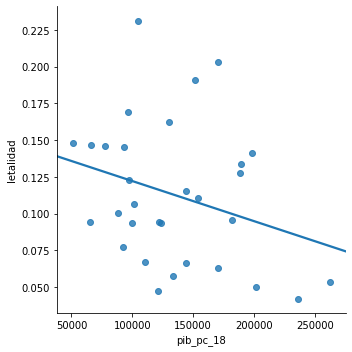

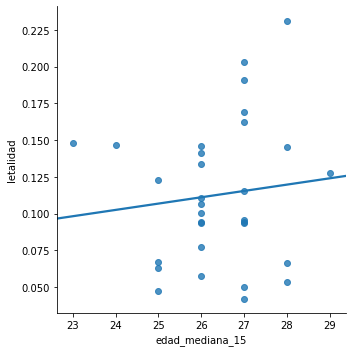

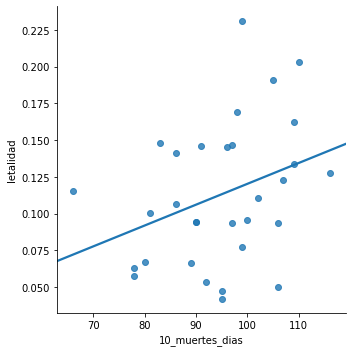

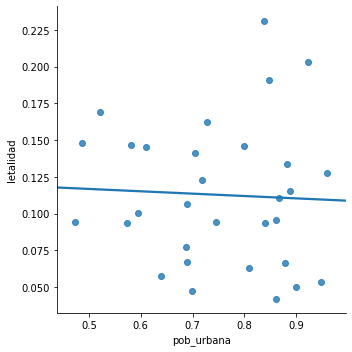

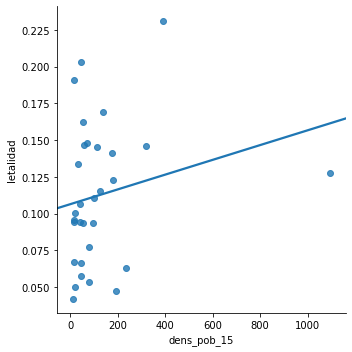

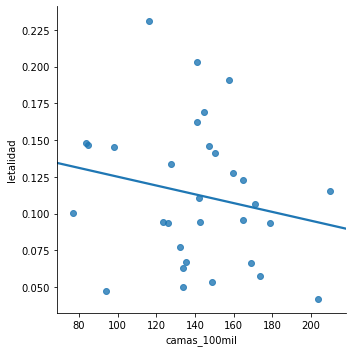

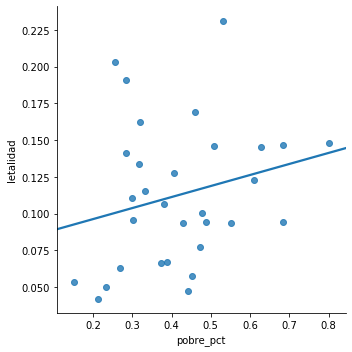

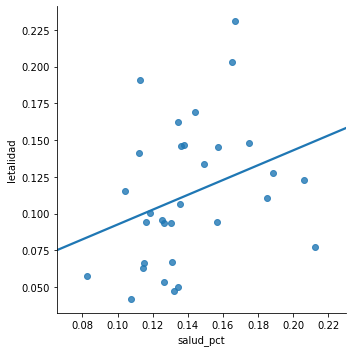

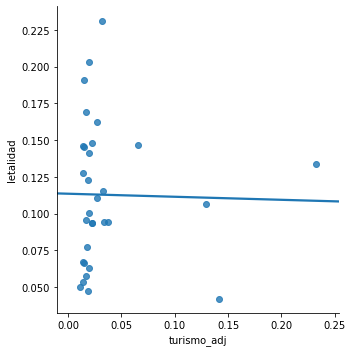

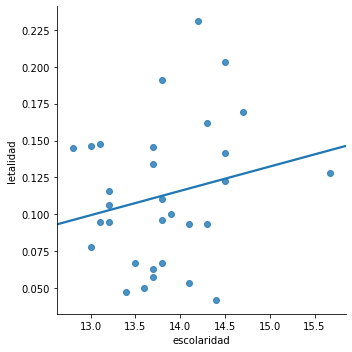

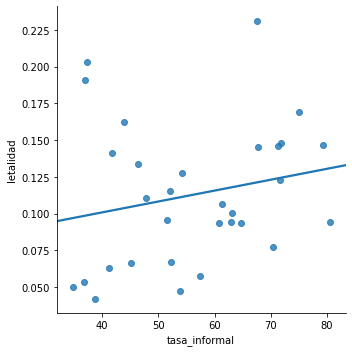

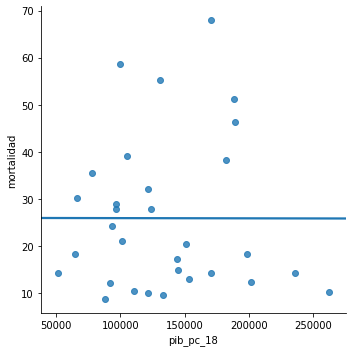

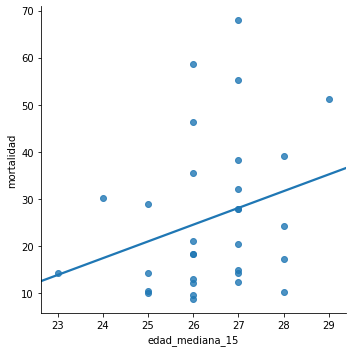

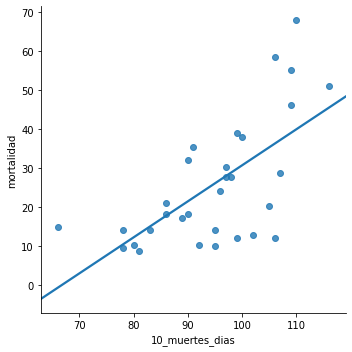

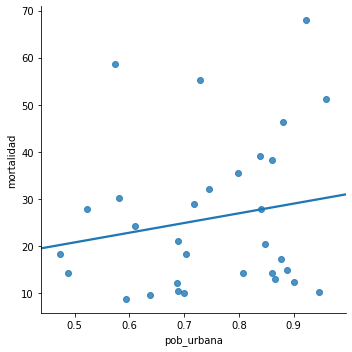

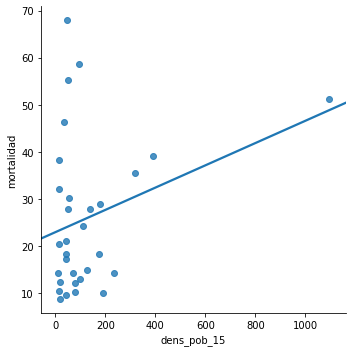

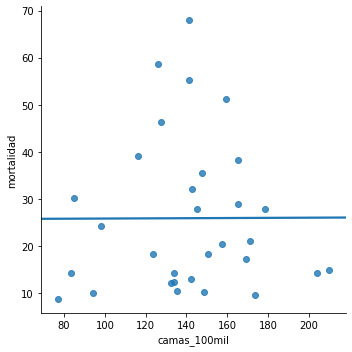

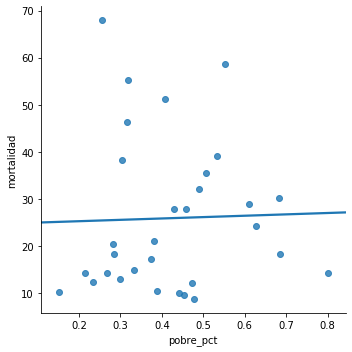

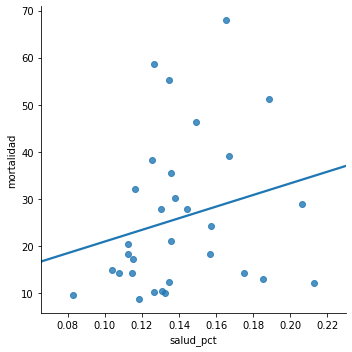

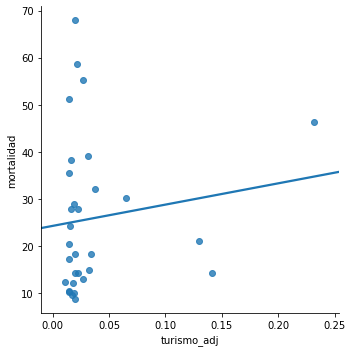

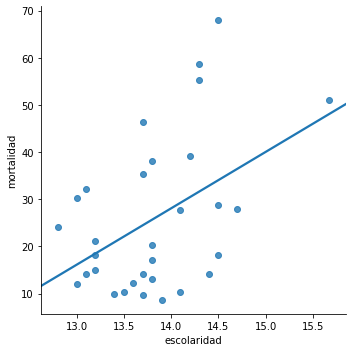

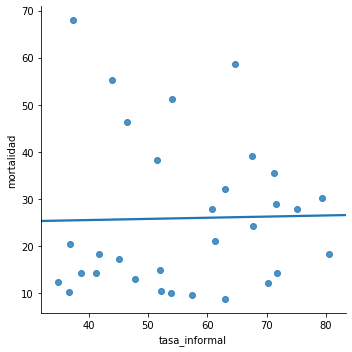

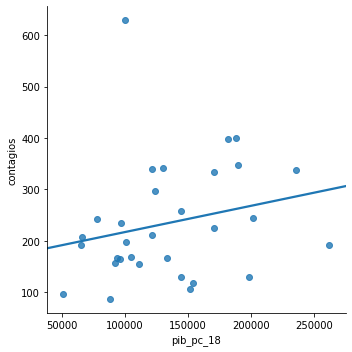

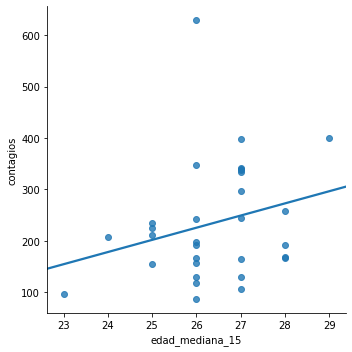

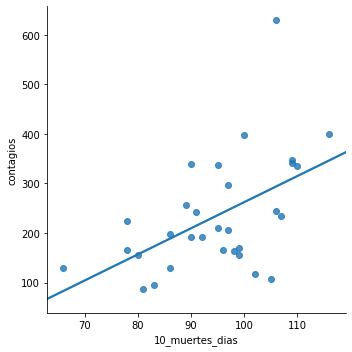

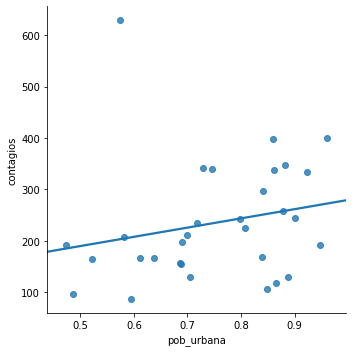

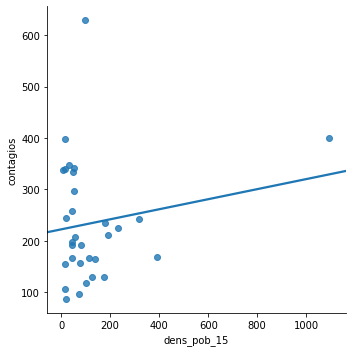

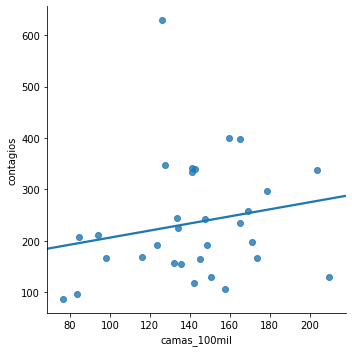

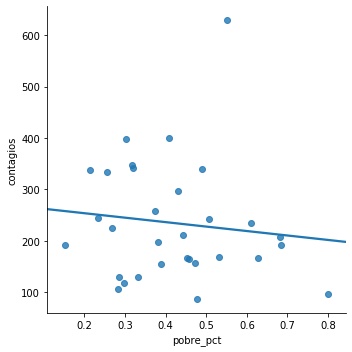

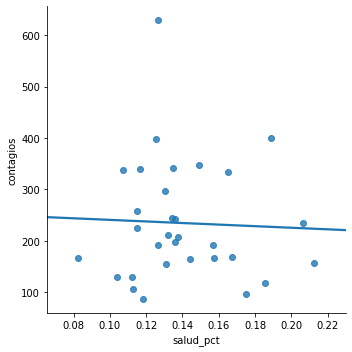

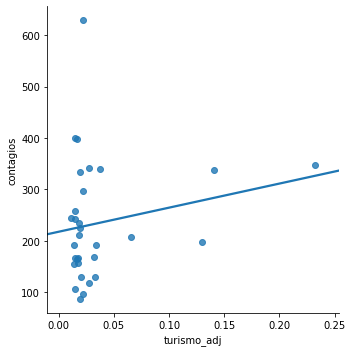

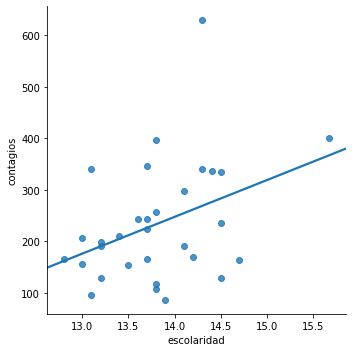

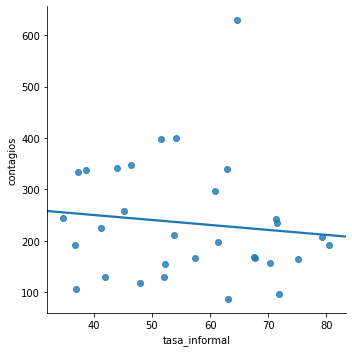

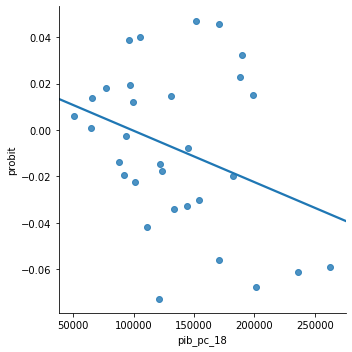

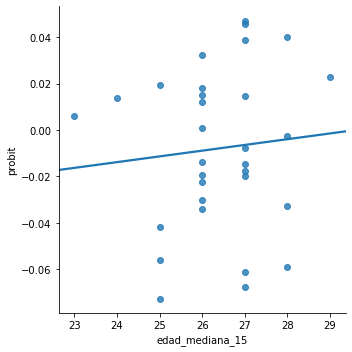

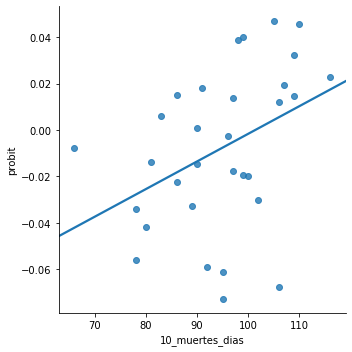

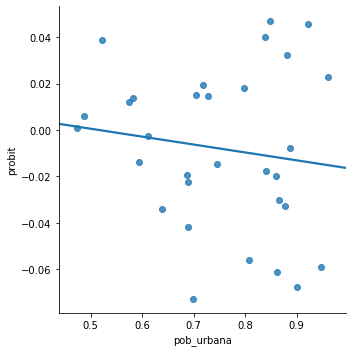

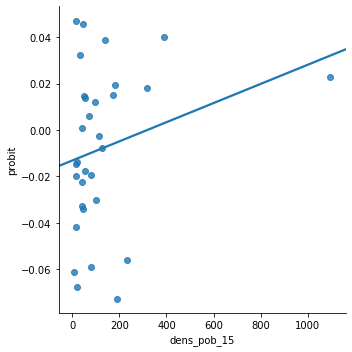

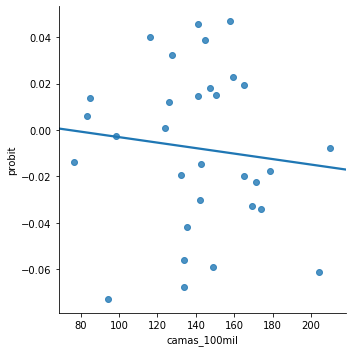

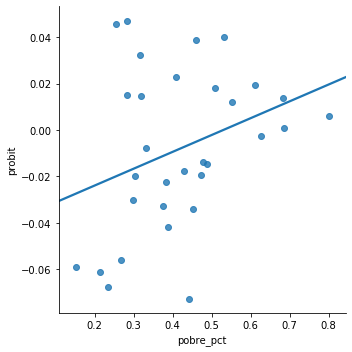

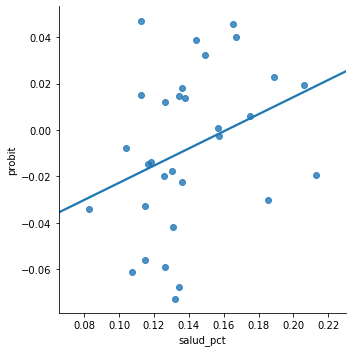

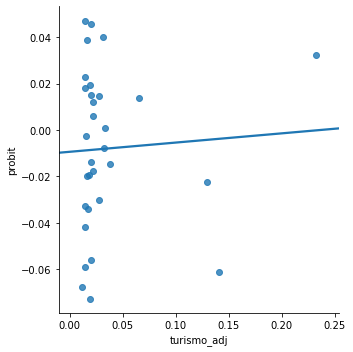

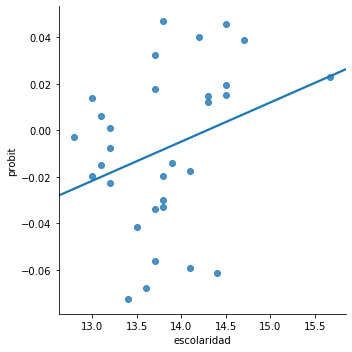

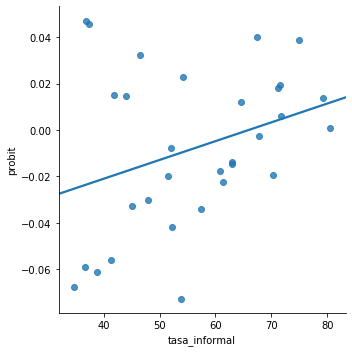

In [3]:
ye=['letalidad','mortalidad','contagios','probit']
equis=['pib_pc_18','edad_mediana_15','10_muertes_dias','pob_urbana','dens_pob_15','camas_100mil','pobre_pct','salud_pct','turismo_adj','escolaridad','tasa_informal']
for i in range(len(ye)):
    for j in range(len(equis)):
        sns.lmplot(x=equis[j], y=ye[i], data=df2, ci=None)

In [4]:
equis=['pib_pc_18','edad_mediana_15','10_muertes_dias','dens_pob_15','camas_100mil','escolaridad']

for i in range(len(equis)):
    df2['ln_'+equis[i]]=np.log(df2[equis[i]])

In [5]:
equis2=['ln_pib_pc_18','ln_edad_mediana_15','ln_10_muertes_dias','ln_dens_pob_15','ln_camas_100mil','ln_escolaridad']
X=np.log(df2[equis2])
X['pob_urbana']=df2['pob_urbana']
X['pobre_pct']=df2['pobre_pct']
X['salud_pct']=df2['salud_pct']
X['turismo_adj']=df2['turismo_adj']
X['tasa_informal']=df2['tasa_informal']/100
X['ln_10_muertes_dias_2']=df2['ln_10_muertes_dias']**2
X['ln_10_muertes_dias_3']=df2['ln_10_muertes_dias']**3
X = sm.add_constant(X)

y=df2['letalidad']
model = sm.OLS(y, X).fit()
model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              letalidad   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     1.327
Date:                Tue, 21 Jul 2020   Prob (F-statistic):              0.288
Time:                        11:58:19   Log-Likelihood:                 61.368
No. Observations:                  31   AIC:                            -94.74
Df Residuals:                      17   BIC:                            -74.66
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  203.6230    177.970      1.144      0.268    -171.861     579.107
ln_pib_pc_18            -2.0466      0.827     -2.473      0.024      -3.792      -0.301
ln_edad_mediana_15       1.1447      0.841      1.361      0.191      -0.630       2.919
ln_10_muertes_dias    -299.8008    269.160     -1.114      0.281    -867.678     268.076
ln_dens_pob_15           0.0342      0.042      0.814      0.427      -0.054       0.123
ln_camas_100mil         -0.1470      0.241     -0.610      0.550      -0.655       0.361
ln_escolaridad           1.2530      0.850      1.473      0.159      -0.541       3.047
pob_urbana               0.0466      0.122      0.381      0.708      -0.211       0.304
pobre_pct               -0.0113      0.173     -0.065      0.949      -0.376       0.353
salud_pct               -0.0125      0.443     -0.028      0.978      -0.948       0.923
turismo_adj              0.2483      0.208      1.196      0.248      -0.190       0.686
tasa_informal           -0.2586      0.200     -1.294      0.213      -0.680       0.163
ln_10_muertes_dias_2    22.2127     20.264      1.096      0.288     -20.540      64.965
ln_10_muertes_dias_3    -2.1908      2.016     -1.087      0.292      -6.445       2.063
==============================================================================
Omnibus:                        0.541   Durbin-Watson:                   2.170
Prob(Omnibus):                  0.763   Jarque-Bera (JB):                0.648
Skew:                           0.157   Prob(JB):                        0.723
Kurtosis:                       2.365   Cond. No.                     3.85e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.85e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
y=np.log(df2['mortalidad'])
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             mortalidad   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     2.861
Date:                Tue, 21 Jul 2020   Prob (F-statistic):             0.0223
Time:                        11:58:19   Log-Likelihood:                -9.7159
No. Observations:                  31   AIC:                             47.43
Df Residuals:                      17   BIC:                             67.51
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -503.7842   1762.766     -0.286      0.778   -4222.895    3215.326
ln_pib_pc_18           -10.7506      8.196     -1.312      0.207     -28.042       6.541
ln_edad_mediana_15       4.5001      8.331      0.540      0.596     -13.076      22.076
ln_10_muertes_dias     841.3617   2665.983      0.316      0.756   -4783.371    6466.094
ln_dens_pob_15           0.4433      0.416      1.067      0.301      -0.433       1.320
ln_camas_100mil          2.1355      2.386      0.895      0.383      -2.898       7.170
ln_escolaridad           2.9419      8.423      0.349      0.731     -14.829      20.713
pob_urbana               1.0575      1.210      0.874      0.395      -1.496       3.611
pobre_pct                0.4196      1.710      0.245      0.809      -3.188       4.028
salud_pct               -9.2924      4.390     -2.117      0.049     -18.554      -0.031
turismo_adj              2.5442      2.056      1.238      0.233      -1.793       6.881
tasa_informal            0.4113      1.979      0.208      0.838      -3.764       4.587
ln_10_muertes_dias_2   -69.5348    200.709     -0.346      0.733    -492.994     353.924
ln_10_muertes_dias_3     7.2807     19.970      0.365      0.720     -34.853      49.414
==============================================================================
Omnibus:                        1.420   Durbin-Watson:                   2.159
Prob(Omnibus):                  0.492   Jarque-Bera (JB):                1.118
Skew:                           0.454   Prob(JB):                        0.572
Kurtosis:                       2.798   Cond. No.                     3.85e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.85e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
y=np.log(df2['contagios'])
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              contagios   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     1.955
Date:                Tue, 21 Jul 2020   Prob (F-statistic):             0.0975
Time:                        11:58:19   Log-Likelihood:                -5.5487
No. Observations:                  31   AIC:                             39.10
Df Residuals:                      17   BIC:                             59.17
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1792.1725   1541.038     -1.163      0.261   -5043.478    1459.133
ln_pib_pc_18             7.3846      7.165      1.031      0.317      -7.732      22.501
ln_edad_mediana_15      -5.1140      7.283     -0.702      0.492     -20.479      10.251
ln_10_muertes_dias    2703.9445   2330.645      1.160      0.262   -2213.287    7621.175
ln_dens_pob_15           0.1334      0.363      0.367      0.718      -0.633       0.900
ln_camas_100mil          2.9694      2.086      1.424      0.173      -1.431       7.370
ln_escolaridad          -6.0367      7.363     -0.820      0.424     -21.572       9.499
pob_urbana               0.7581      1.058      0.716      0.483      -1.475       2.991
pobre_pct                0.7883      1.495      0.527      0.605      -2.366       3.942
salud_pct               -9.2044      3.838     -2.398      0.028     -17.301      -1.108
turismo_adj              0.4132      1.797      0.230      0.821      -3.378       4.205
tasa_informal            2.0987      1.730      1.213      0.242      -1.552       5.749
ln_10_muertes_dias_2  -204.9194    175.463     -1.168      0.259    -575.114     165.275
ln_10_muertes_dias_3    20.4992     17.458      1.174      0.257     -16.335      57.333
==============================================================================
Omnibus:                        8.572   Durbin-Watson:                   1.485
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                8.530
Skew:                          -0.731   Prob(JB):                       0.0141
Kurtosis:                       5.113   Cond. No.                     3.85e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.85e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
y=df2['probit']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 probit   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     1.750
Date:                Tue, 21 Jul 2020   Prob (F-statistic):              0.139
Time:                        11:58:19   Log-Likelihood:                 73.998
No. Observations:                  31   AIC:                            -120.0
Df Residuals:                      17   BIC:                            -99.92
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   63.0115    118.415      0.532      0.602    -186.822     312.845
ln_pib_pc_18            -1.1076      0.551     -2.012      0.060      -2.269       0.054
ln_edad_mediana_15       0.5993      0.560      1.071      0.299      -0.581       1.780
ln_10_muertes_dias     -88.8522    179.089     -0.496      0.626    -466.698     288.993
ln_dens_pob_15           0.0125      0.028      0.446      0.661      -0.046       0.071
ln_camas_100mil          0.0243      0.160      0.152      0.881      -0.314       0.363
ln_escolaridad           0.8612      0.566      1.522      0.146      -0.333       2.055
pob_urbana              -0.0044      0.081     -0.055      0.957      -0.176       0.167
pobre_pct                0.0111      0.115      0.096      0.924      -0.231       0.253
salud_pct               -0.1189      0.295     -0.403      0.692      -0.741       0.503
turismo_adj              0.1835      0.138      1.329      0.202      -0.108       0.475
tasa_informal           -0.0829      0.133     -0.624      0.541      -0.363       0.198
ln_10_muertes_dias_2     6.2208     13.483      0.461      0.650     -22.225      34.667
ln_10_muertes_dias_3    -0.5945      1.342     -0.443      0.663      -3.425       2.236
==============================================================================
Omnibus:                        1.495   Durbin-Watson:                   2.290
Prob(Omnibus):                  0.474   Jarque-Bera (JB):                0.665
Skew:                           0.329   Prob(JB):                        0.717
Kurtosis:                       3.286   Cond. No.                     3.85e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.85e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
X=X.drop(columns='pob_urbana')

y=df2['probit']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 probit   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     2.007
Date:                Tue, 21 Jul 2020   Prob (F-statistic):             0.0882
Time:                        11:58:19   Log-Likelihood:                 73.995
No. Observations:                  31   AIC:                            -122.0
Df Residuals:                      18   BIC:                            -103.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   62.4253    114.614      0.545      0.593    -178.370     303.221
ln_pib_pc_18            -1.1129      0.527     -2.113      0.049      -2.220      -0.006
ln_edad_mediana_15       0.5906      0.522      1.132      0.272      -0.505       1.687
ln_10_muertes_dias     -87.9651    173.340     -0.507      0.618    -452.139     276.209
ln_dens_pob_15           0.0122      0.027      0.456      0.654      -0.044       0.068
ln_camas_100mil          0.0225      0.152      0.148      0.884      -0.297       0.342
ln_escolaridad           0.8655      0.544      1.590      0.129      -0.278       2.009
pobre_pct                0.0113      0.112      0.101      0.920      -0.223       0.246
salud_pct               -0.1232      0.276     -0.446      0.661      -0.703       0.457
turismo_adj              0.1828      0.134      1.368      0.188      -0.098       0.464
tasa_informal           -0.0811      0.125     -0.649      0.524      -0.343       0.181
ln_10_muertes_dias_2     6.1567     13.054      0.472      0.643     -21.269      33.582
ln_10_muertes_dias_3    -0.5883      1.299     -0.453      0.656      -3.318       2.141
==============================================================================
Omnibus:                        1.606   Durbin-Watson:                   2.279
Prob(Omnibus):                  0.448   Jarque-Bera (JB):                0.726
Skew:                           0.340   Prob(JB):                        0.696
Kurtosis:                       3.317   Cond. No.                     3.84e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.84e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
X=X.drop(columns='pobre_pct')

y=df2['probit']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 probit   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     2.308
Date:                Tue, 21 Jul 2020   Prob (F-statistic):             0.0527
Time:                        11:58:19   Log-Likelihood:                 73.986
No. Observations:                  31   AIC:                            -124.0
Df Residuals:                      19   BIC:                            -106.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   59.4772    107.930      0.551      0.588    -166.422     285.376
ln_pib_pc_18            -1.1322      0.478     -2.368      0.029      -2.133      -0.132
ln_edad_mediana_15       0.5861      0.506      1.158      0.261      -0.473       1.645
ln_10_muertes_dias     -83.3606    162.856     -0.512      0.615    -424.221     257.500
ln_dens_pob_15           0.0124      0.026      0.478      0.638      -0.042       0.067
ln_camas_100mil          0.0194      0.145      0.133      0.895      -0.284       0.323
ln_escolaridad           0.8559      0.522      1.640      0.118      -0.237       1.948
salud_pct               -0.1267      0.267     -0.475      0.640      -0.685       0.431
turismo_adj              0.1812      0.129      1.402      0.177      -0.089       0.452
tasa_informal           -0.0741      0.102     -0.728      0.475      -0.287       0.139
ln_10_muertes_dias_2     5.8051     12.252      0.474      0.641     -19.838      31.448
ln_10_muertes_dias_3    -0.5530      1.219     -0.454      0.655      -3.104       1.997
==============================================================================
Omnibus:                        1.711   Durbin-Watson:                   2.267
Prob(Omnibus):                  0.425   Jarque-Bera (JB):                0.800
Skew:                           0.358   Prob(JB):                        0.670
Kurtosis:                       3.329   Cond. No.                     3.71e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.71e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
X=X.drop(columns='ln_camas_100mil')

y=df2['probit']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 probit   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     2.669
Date:                Tue, 21 Jul 2020   Prob (F-statistic):             0.0296
Time:                        11:58:19   Log-Likelihood:                 73.972
No. Observations:                  31   AIC:                            -125.9
Df Residuals:                      20   BIC:                            -110.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   63.2746    101.524      0.623      0.540    -148.502     275.051
ln_pib_pc_18            -1.1152      0.449     -2.483      0.022      -2.052      -0.178
ln_edad_mediana_15       0.5977      0.486      1.230      0.233      -0.416       1.612
ln_10_muertes_dias     -89.0835    153.205     -0.581      0.567    -408.663     230.496
ln_dens_pob_15           0.0117      0.025      0.472      0.642      -0.040       0.063
ln_escolaridad           0.8769      0.485      1.806      0.086      -0.136       1.889
salud_pct               -0.1232      0.259     -0.476      0.639      -0.663       0.417
turismo_adj              0.1822      0.126      1.449      0.163      -0.080       0.445
tasa_informal           -0.0722      0.098     -0.735      0.471      -0.277       0.133
ln_10_muertes_dias_2     6.2283     11.540      0.540      0.595     -17.844      30.300
ln_10_muertes_dias_3    -0.5948      1.148     -0.518      0.610      -2.990       1.801
==============================================================================
Omnibus:                        1.757   Durbin-Watson:                   2.249
Prob(Omnibus):                  0.415   Jarque-Bera (JB):                0.800
Skew:                           0.345   Prob(JB):                        0.670
Kurtosis:                       3.377   Cond. No.                     3.57e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.57e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
X=X.drop(columns='ln_dens_pob_15')

y=df2['probit']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 probit   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     3.053
Date:                Tue, 21 Jul 2020   Prob (F-statistic):             0.0168
Time:                        11:58:20   Log-Likelihood:                 73.800
No. Observations:                  31   AIC:                            -127.6
Df Residuals:                      21   BIC:                            -113.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   64.7305     99.583      0.650      0.523    -142.363     271.824
ln_pib_pc_18            -1.0877      0.437     -2.488      0.021      -1.997      -0.179
ln_edad_mediana_15       0.5903      0.477      1.238      0.229      -0.401       1.582
ln_10_muertes_dias     -91.1794    150.281     -0.607      0.551    -403.705     221.347
ln_escolaridad           0.9392      0.458      2.049      0.053      -0.014       1.893
salud_pct               -0.0794      0.237     -0.335      0.741      -0.572       0.414
turismo_adj              0.1685      0.120      1.403      0.175      -0.081       0.418
tasa_informal           -0.0611      0.094     -0.652      0.521      -0.256       0.134
ln_10_muertes_dias_2     6.3606     11.321      0.562      0.580     -17.183      29.904
ln_10_muertes_dias_3    -0.6069      1.127     -0.539      0.596      -2.950       1.736
==============================================================================
Omnibus:                        2.092   Durbin-Watson:                   2.209
Prob(Omnibus):                  0.351   Jarque-Bera (JB):                1.018
Skew:                           0.384   Prob(JB):                        0.601
Kurtosis:                       3.446   Cond. No.                     3.57e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.57e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
X=X.drop(columns='salud_pct')

y=df2['probit']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 probit   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     3.565
Date:                Tue, 21 Jul 2020   Prob (F-statistic):            0.00851
Time:                        11:58:20   Log-Likelihood:                 73.717
No. Observations:                  31   AIC:                            -129.4
Df Residuals:                      22   BIC:                            -116.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   68.9705     96.761      0.713      0.483    -131.699     269.640
ln_pib_pc_18            -1.0998      0.427     -2.577      0.017      -1.985      -0.215
ln_edad_mediana_15       0.6197      0.459      1.350      0.191      -0.332       1.572
ln_10_muertes_dias     -97.8395    145.922     -0.670      0.510    -400.463     204.784
ln_escolaridad           0.9642      0.443      2.176      0.041       0.045       1.883
turismo_adj              0.1759      0.116      1.521      0.143      -0.064       0.416
tasa_informal           -0.0704      0.088     -0.804      0.430      -0.252       0.111
ln_10_muertes_dias_2     6.8846     10.984      0.627      0.537     -15.895      29.664
ln_10_muertes_dias_3    -0.6603      1.093     -0.604      0.552      -2.926       1.606
==============================================================================
Omnibus:                        2.286   Durbin-Watson:                   2.255
Prob(Omnibus):                  0.319   Jarque-Bera (JB):                1.193
Skew:                           0.433   Prob(JB):                        0.551
Kurtosis:                       3.416   Cond. No.                     3.54e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.54e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
X=X.drop(columns='ln_10_muertes_dias_3')

y=df2['probit']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 probit   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     4.136
Date:                Tue, 21 Jul 2020   Prob (F-statistic):            0.00444
Time:                        11:58:20   Log-Likelihood:                 73.462
No. Observations:                  31   AIC:                            -130.9
Df Residuals:                      23   BIC:                            -119.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   10.5770      5.037      2.100      0.047       0.157      20.997
ln_pib_pc_18            -1.0418      0.410     -2.541      0.018      -1.890      -0.194
ln_edad_mediana_15       0.6576      0.448      1.467      0.156      -0.270       1.585
ln_10_muertes_dias      -9.7059      4.888     -1.986      0.059     -19.817       0.405
ln_escolaridad           0.8382      0.386      2.174      0.040       0.041       1.636
turismo_adj              0.1697      0.114      1.494      0.149      -0.065       0.405
tasa_informal           -0.0572      0.084     -0.684      0.501      -0.230       0.116
ln_10_muertes_dias_2     0.2472      0.122      2.034      0.054      -0.004       0.499
==============================================================================
Omnibus:                        2.689   Durbin-Watson:                   2.226
Prob(Omnibus):                  0.261   Jarque-Bera (JB):                1.571
Skew:                           0.522   Prob(JB):                        0.456
Kurtosis:                       3.356   Cond. No.                     3.11e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
X=X.drop(columns='tasa_informal')

y=df2['probit']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 probit   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     4.855
Date:                Tue, 21 Jul 2020   Prob (F-statistic):            0.00224
Time:                        11:58:20   Log-Likelihood:                 73.150
No. Observations:                  31   AIC:                            -132.3
Df Residuals:                      24   BIC:                            -122.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   10.4709      4.978      2.103      0.046       0.196      20.746
ln_pib_pc_18            -0.7940      0.190     -4.181      0.000      -1.186      -0.402
ln_edad_mediana_15       0.5418      0.411      1.320      0.199      -0.306       1.389
ln_10_muertes_dias     -10.0495      4.808     -2.090      0.047     -19.972      -0.127
ln_escolaridad           0.7774      0.371      2.096      0.047       0.012       1.543
turismo_adj              0.1498      0.109      1.380      0.180      -0.074       0.374
ln_10_muertes_dias_2     0.2559      0.120      2.141      0.043       0.009       0.503
==============================================================================
Omnibus:                        4.592   Durbin-Watson:                   2.172
Prob(Omnibus):                  0.101   Jarque-Bera (JB):                3.022
Skew:                           0.684   Prob(JB):                        0.221
Kurtosis:                       3.686   Cond. No.                     3.11e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
X=X.drop(columns='ln_edad_mediana_15')

y=df2['probit']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 probit   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     5.320
Date:                Tue, 21 Jul 2020   Prob (F-statistic):            0.00183
Time:                        11:58:20   Log-Likelihood:                 72.064
No. Observations:                  31   AIC:                            -132.1
Df Residuals:                      25   BIC:                            -123.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.1490      5.025      2.219      0.036       0.801      21.498
ln_pib_pc_18            -0.6734      0.169     -3.986      0.001      -1.021      -0.326
ln_10_muertes_dias     -10.4381      4.869     -2.144      0.042     -20.466      -0.410
ln_escolaridad           0.8076      0.376      2.149      0.041       0.034       1.581
turismo_adj              0.1176      0.107      1.096      0.284      -0.104       0.339
ln_10_muertes_dias_2     0.2669      0.121      2.206      0.037       0.018       0.516
==============================================================================
Omnibus:                        1.439   Durbin-Watson:                   2.464
Prob(Omnibus):                  0.487   Jarque-Bera (JB):                0.768
Skew:                           0.380   Prob(JB):                        0.681
Kurtosis:                       3.130   Cond. No.                     3.09e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
X=X.drop(columns='turismo_adj')

y=df2['probit']
model1 = sm.OLS(y, X).fit()
res1=model1.summary()
pred1=model1.predict(X)
res1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 probit   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     6.301
Date:                Tue, 21 Jul 2020   Prob (F-statistic):            0.00110
Time:                        11:59:49   Log-Likelihood:                 71.337
No. Observations:                  31   AIC:                            -132.7
Df Residuals:                      26   BIC:                            -125.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.2873      5.042      2.238      0.034       0.922      21.652
ln_pib_pc_18            -0.6289      0.165     -3.821      0.001      -0.967      -0.291
ln_10_muertes_dias     -10.6007      4.886     -2.170      0.039     -20.643      -0.558
ln_escolaridad           0.7025      0.365      1.926      0.065      -0.047       1.452
ln_10_muertes_dias_2     0.2719      0.121      2.241      0.034       0.022       0.521
==============================================================================
Omnibus:                        0.784   Durbin-Watson:                   2.241
Prob(Omnibus):                  0.676   Jarque-Bera (JB):                0.403
Skew:                           0.279   Prob(JB):                        0.817
Kurtosis:                       2.992   Cond. No.                     3.09e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
comparacion=pd.DataFrame(df2[['Estado','probit']])
comparacion['Con días al cuadrado']=pred1
comparacion['Sin días al cuadrado']=pred2
comparacion

,Estado,probit,Con días al cuadrado,Sin días al cuadrado
0,Aguascalientes,-0.057600,-0.041460,-0.039314
1,Baja California,0.045800,0.010292,0.000215
2,Baja California Sur,-0.053100,-0.040149,-0.028147
3,Campeche,-0.013100,-0.018476,-0.009658
4,Coahuila de Zaragoza,-0.065700,-0.008148,-0.010040
5,Colima,-0.005200,-0.016069,-0.053650
6,Chiapas,0.001200,0.016435,0.015453
7,Chihuahua,0.050700,0.002033,-0.000489
9,Durango,-0.042300,-0.021837,-0.019880
10,Guanajuato,-0.074800,-0.010207,-0.003326


In [20]:
coef=pd.DataFrame(model1.params)

ln_dias=np.log(range(1,250))
ln_dias2=ln_dias**2
probit_adj= coef.iloc[2,0]*ln_dias + coef.iloc[3,0]*ln_dias*ln_dias2

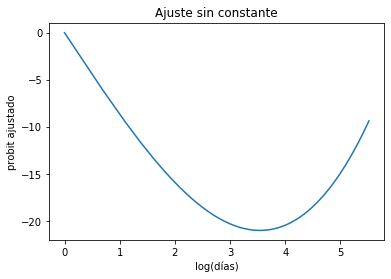

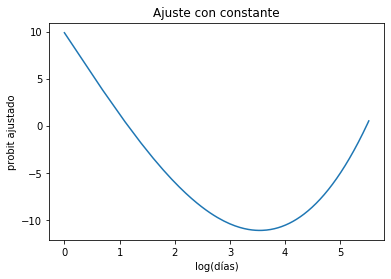

In [21]:
plt.plot(ln_dias,probit_adj)
plt.xlabel('log(días)')
plt.ylabel('probit ajustado')
plt.title('Ajuste sin constante')
plt.show()

probit_adj=coef.iloc[0,0] + coef.iloc[2,0]*ln_dias + coef.iloc[3,0]*ln_dias*ln_dias2
plt.plot(ln_dias,probit_adj)
plt.xlabel('log(días)')
plt.ylabel('probit ajustado')
plt.title('Ajuste con constante')
plt.show()